# Exploratory Data Analysis

In [3]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)

In [4]:
con <- dbConnect(RSQLite::SQLite(),"../data/BoxOffice.db")

In [5]:
movies <- dbReadTable(con,"movies")
head(movies)

id,budget,homepage,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,tagline,revenue
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,14000000,NA,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93,Released,The Laws of Space and Time are About to be Violated.,12314651
2,40000000,NA,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,113,Released,It can take a lifetime to find true love; she's got 30 days!,95149435
3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,105,Released,The road to greatness can take you to the edge.,13092000
4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,122,Released,NA,16000000
5,0,NA,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,118,Released,NA,3923970
6,8000000,NA,tt0093743,en,Pinocchio and the Emperor of the Night,0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,8/6/87,83,Released,NA,3261638


# Main table analysis

In [6]:
summary(movies)

       id           budget           homepage           imdb_id         
 Min.   :   1   Min.   :0.00e+00   Length:7398        Length:7398       
 1st Qu.:1850   1st Qu.:0.00e+00   Class :character   Class :character  
 Median :3700   Median :7.50e+06   Mode  :character   Mode  :character  
 Mean   :3700   Mean   :2.26e+07                                        
 3rd Qu.:5549   3rd Qu.:2.80e+07                                        
 Max.   :7398   Max.   :3.80e+08                                        
                                                                        
 original_language  original_title       popularity      poster_path       
 Length:7398        Length:7398        Min.   :  0.000   Length:7398       
 Class :character   Class :character   1st Qu.:  3.933   Class :character  
 Mode  :character   Mode  :character   Median :  7.436   Mode  :character  
                                       Mean   :  8.515                     
                                    

In [7]:
### frequencies of original language
table(movies$original_language)



  af   ar   bm   bn   ca   cn   cs   da   de   el   en   es   fa   fi   fr   he 
   1    1    2    3    1   41    3   17   49    3 6351   95    5    4  199    6 
  hi   hu   id   is   it   ja   ka   kn   ko   ml   mr   nb   nl   no   pl   pt 
 118    4    3    1   56   90    1    1   49   12    1    1   11    5    5   13 
  ro   ru   sr   sv   ta   te   th   tr   ur   vi   xx   zh 
   9  109    3   20   31    9    5    9    2    1    2   46 

In [8]:
### differences between the average revenue by language?
movies %>% 
    group_by(original_language) %>% 
    summarise(revenue_avg=mean(revenue,na.rm=T), revenue_sd=sd(revenue,na.rm=T),n=n()) %>% 
    arrange(desc(n))

original_language,revenue_avg,revenue_sd,n
<chr>,<dbl>,<dbl>,<int>
en,74665908.7,145916031.3,6351
fr,17132565.7,51746646.0,199
hi,25346368.7,49616798.9,118
ru,6929453.5,11907183.2,109
es,8564790.2,13620381.7,95
ja,30651798.8,32415933.6,90
it,16415129.0,46214461.4,56
de,20530900.6,30979114.7,49
ko,13776704.3,21344783.6,49


Warning message:
“Removed 4398 rows containing non-finite values (stat_density).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


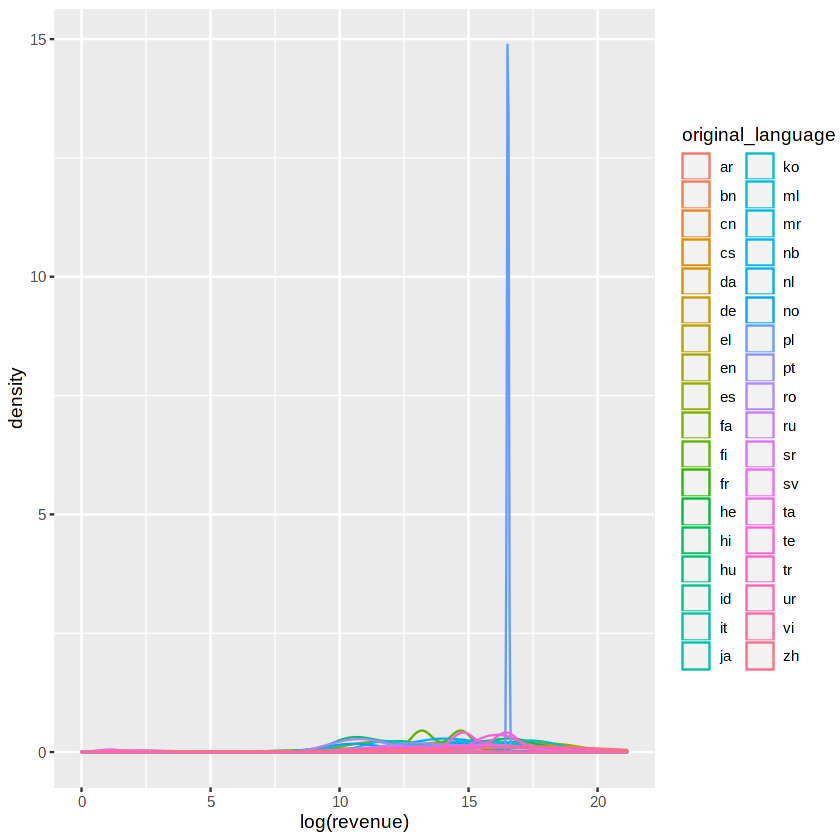

In [10]:
ggplot(data=movies) +
    geom_density(aes(log(revenue), group=original_language, color=original_language))

In [11]:
movies <- movies %>% mutate(orig_lang_en=ifelse(original_language == "english",original_language,'other'))

In [12]:
movies <- movies %>% 
    mutate(orig_lang2=ifelse(original_language %in% c("en","fr","in","ru","es","ja"),original_language,'other'))

In [14]:
### differences between the average revenue by language?
movies %>% 
    group_by(orig_lang2) %>% 
    summarise(revenue_avg=mean(revenue,na.rm=T), revenue_sd=sd(revenue,na.rm=T),n=n()) %>% 
    arrange(desc(n))

orig_lang2,revenue_avg,revenue_sd,n
<chr>,<dbl>,<dbl>,<int>
en,74665909,145916031,6351
other,21583699,47769023,554
fr,17132566,51746646,199
ru,6929453,11907183,109
es,8564790,13620382,95
ja,30651799,32415934,90


Warning message:
“Removed 4398 rows containing non-finite values (stat_density).”


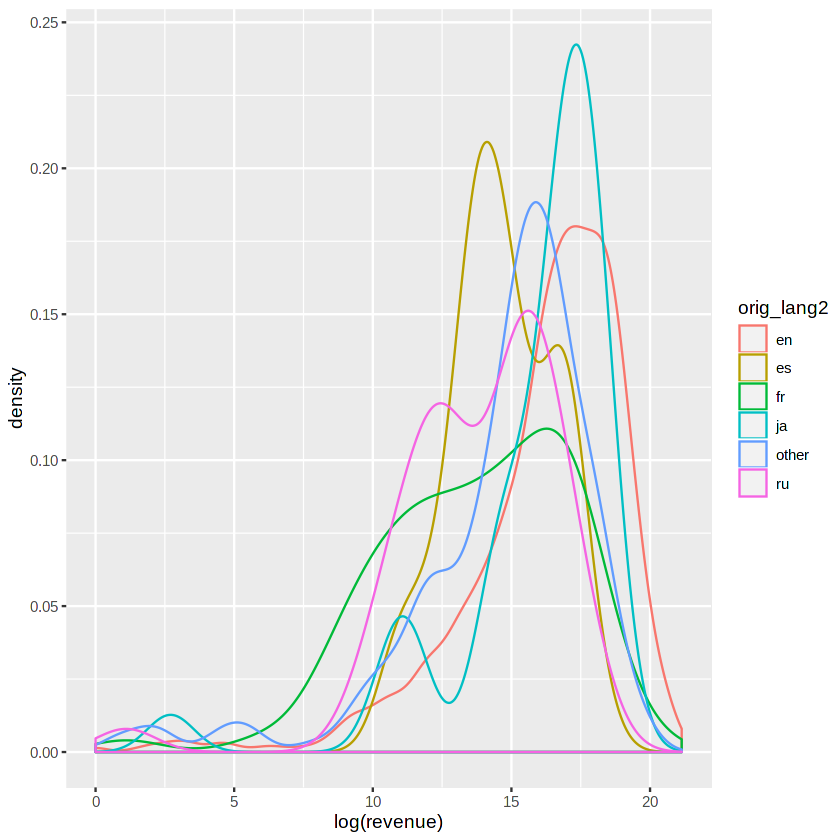

In [15]:
ggplot(data=movies) +
    geom_density(aes(log(revenue), group=orig_lang2, color=orig_lang2))

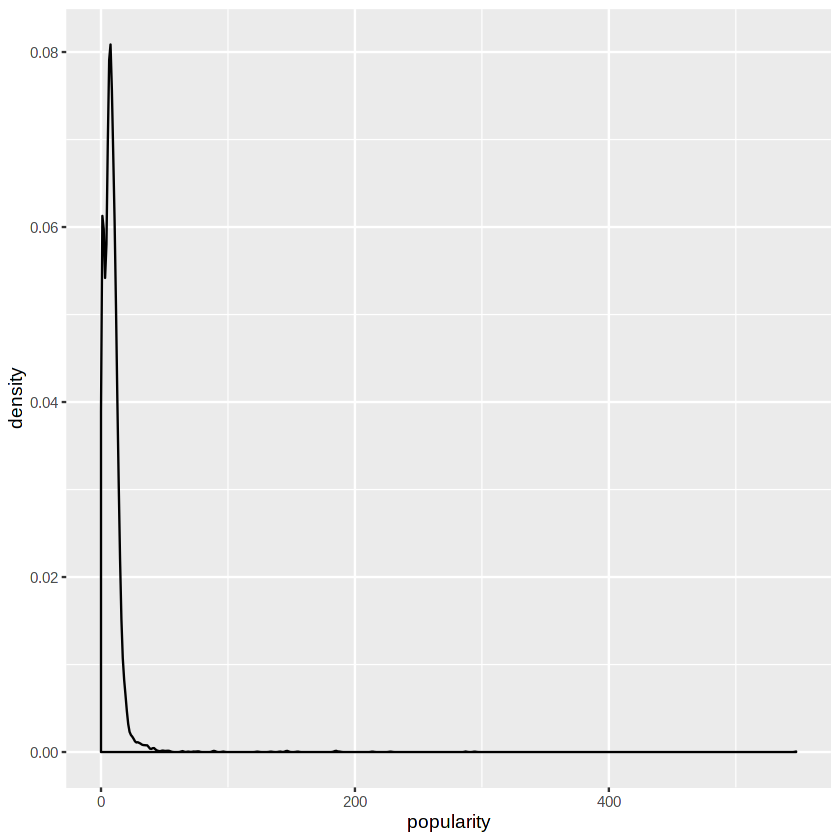

In [16]:
### popularity
ggplot(data=movies) +
    geom_density(aes(popularity))

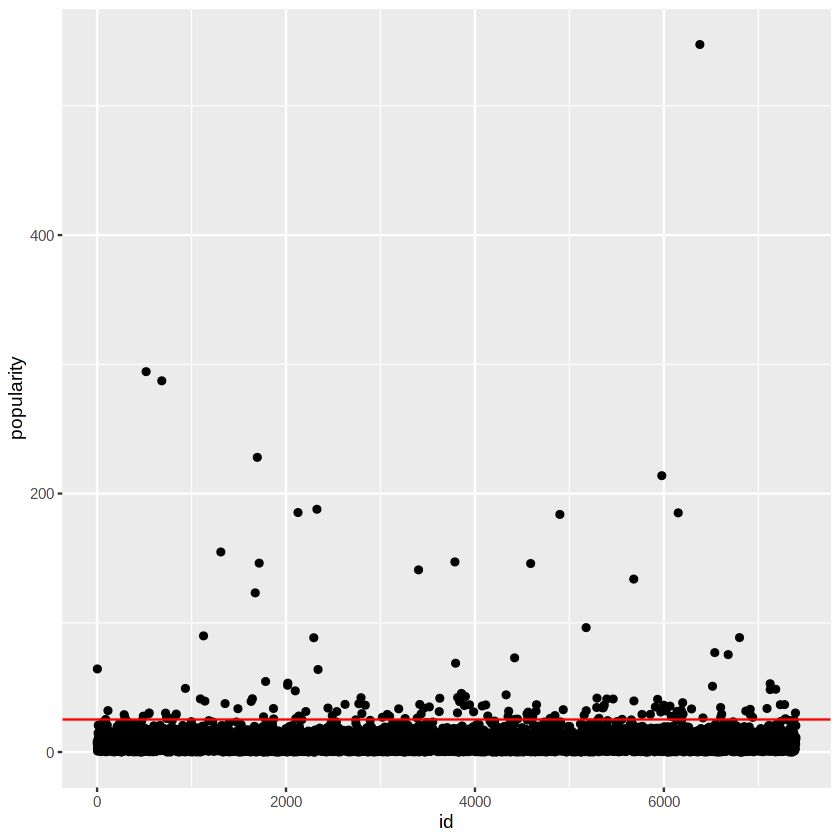

In [17]:
### popularity
ggplot(data=movies) +
    geom_point(aes(x=id, y=popularity)) +
    geom_hline(yintercept = 25,color="red")

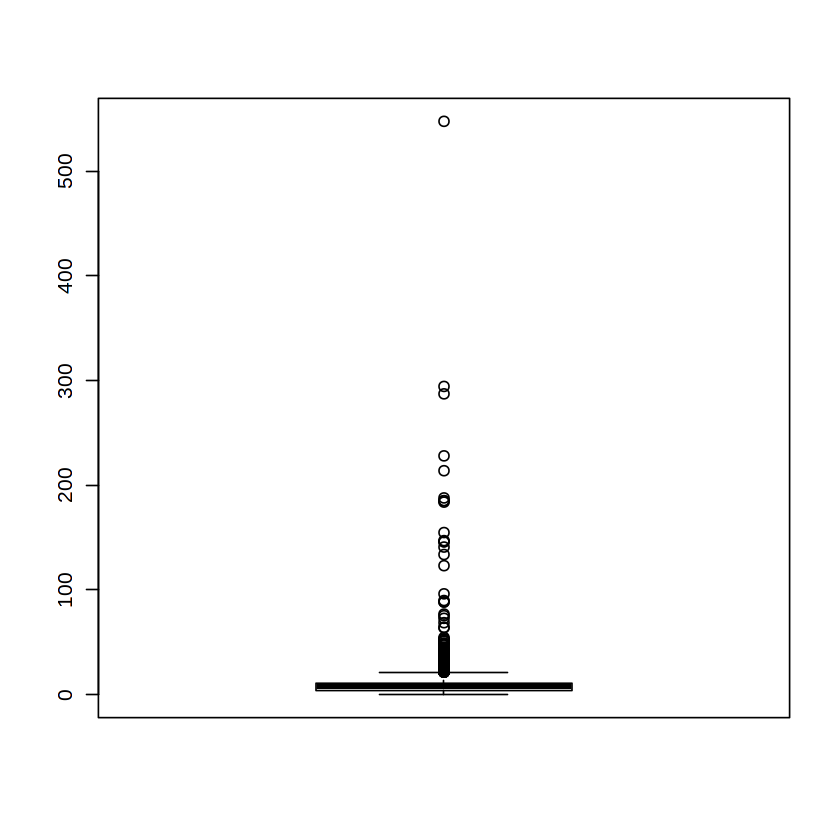

In [18]:
out<- boxplot(movies$popularity)


In [28]:
out$out
min (out$out)

[1]  64.29999  23.06508  25.26187  32.07073  21.79111  28.92084  26.62818
  [8]  23.50123  21.60576  21.76118  23.94735  27.75603 294.33704  29.42354
 [15]  30.20637 287.25365  30.12129  26.02487  26.11492  24.51546  28.50534
 [22]  29.36178  49.24750  23.50843  41.10926  89.88765  39.39497  24.30526
 [29]  23.24730 154.80101  37.48458  22.29608  23.24245  33.53636  21.94694
 [36]  39.18682  41.22577 123.16726 228.03274 146.16179  27.27569  54.58200
 [43]  23.37742  33.70493  25.62993  51.64540  53.29160  47.32667  25.86988
 [50] 185.33099  27.88772  25.08564  31.36366  88.43924 187.86049  63.86960
 [57]  34.04740  22.20161  28.17699  23.25309  31.31401  36.89481  24.92658
 [64]  22.22021  37.37942  42.06148  29.74145  36.26051  24.53573  26.88907
 [71]  29.10815  27.61427  22.08973  21.70827  33.44972  22.07310  25.97250
 [78]  26.23687 140.95024  36.82631  29.42911  33.94936  22.84545  34.90545
 [85]  23.20766  31.28203  41.61376 147.09801  68.72668  30.31625  42.14970
 [92]  38.99514  45.38298  43.84765  35.97258  42.96503  36.56757  31.10227
 [99]  35.63769  36.44760  27.88719  23.98125  22.03840  23.98559  44.25137
[106]  27.47070  31.59594  22.06493  21.53307  72.88408  25.37366  25.49779
[113]  29.45531  24.82355  30.83786 145.88214  26.97233  31.62601  36.63152
[120]  23.18667  21.89353  24.55373  26.05859  28.22421  23.43351 183.87037
[127]  23.30036  32.79048  21.75805  28.46028  96.27237  31.98299  22.49462
[134]  34.45702  22.21156  41.72512  24.24824  26.08100  34.34759  34.14592
[141]  36.26266  41.04887  24.31792  41.05142  22.68517  23.63659  22.66170
[148]  25.30914  24.90306  21.46346 133.82782  39.54065  29.13044  29.15849
[155]  34.85206  40.79677  30.93885 213.84991  36.26380  31.77240  35.52955
[162]  27.54107  24.99074  31.43588 185.07089  23.98407  32.21348  25.30157
[169]  38.18724  29.41334  33.36633 547.48830  26.41996  50.90359  76.93789
[176]  21.57259  34.46125  26.88239  29.32436  22.27450  75.38521  23.42479
[183]  88.56124  31.71898  33.06843  28.71252  26.81775  33.69460  52.85410
[190]  48.30719  48.57329  22.33797  21.52064  36.62931  23.72124  36.71381
[197]  25.77851  24.48389  24.33978  24.64432  30.18820

[1] 21.46346

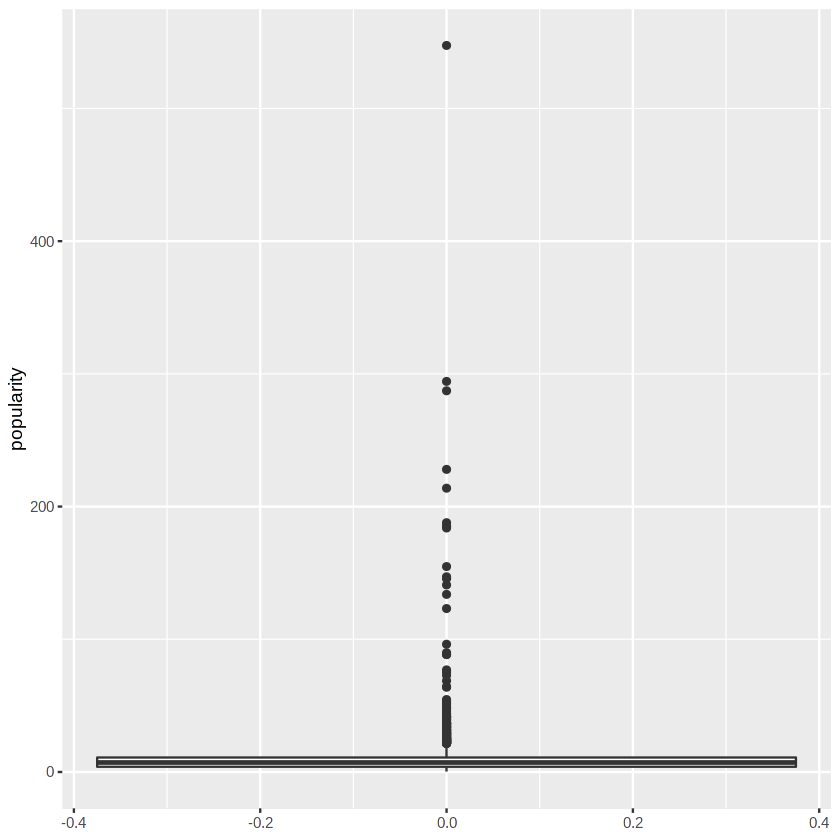

In [21]:
### popularity
ggplot(data=movies) +
    geom_boxplot(aes(y = popularity))

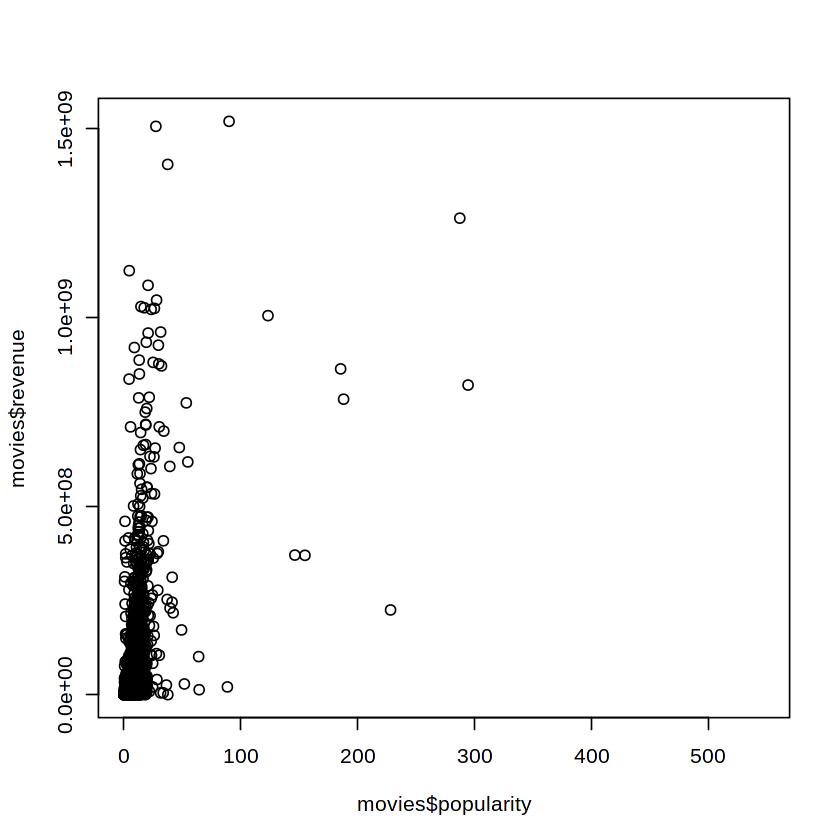

In [22]:
plot(movies$revenue ~ movies$popularity)

In [21]:
# release_date
library(lubridate)



Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




movies$release_date[1:3]
mdy(movies$release_date[1:3])

In [58]:
movies$release_date <- mdy(movies$release_date)


In [59]:
c(min(movies$release_date,na.rm=T),max(movies$release_date,na.rm=T))

[1] "1969-01-01" "2068-12-30"

In [20]:
table(year(movies$release_date))

ERROR: Error in year(movies$release_date): could not find function "year"


In [19]:
movies$release_date <- as_date(ifelse(year(movies$release_date)>2020,
       ymd(as.character(((year(movies$release_date)-100)*10000) + (month(movies$release_date)*100) + day(movies$release_date))),
       movies$release_date))

ERROR: Error in as_date(ifelse(year(movies$release_date) > 2020, ymd(as.character(((year(movies$release_date) - : could not find function "as_date"


In [65]:
c(min(movies$release_date,na.rm=T),max(movies$release_date,na.rm=T))

[1] "1921-01-21" "2018-08-01"


1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 
   1    1    1    1    6    2    3    5    1    2    4    3    6    3    5    6 
1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 
   2    3    6    5    6    6    2    7    6    4    2    9    5    6   10    7 
1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 
  11   14   10   13    7    8   10   14   16   15   15   14   12   15   24   23 
1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 
  15   23   20   16   23   19   26   22   29   43   40   59   65   67   80   78 
1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 
  94  103  112  132  102  104  116  116  139  124  134  138  158  152  159  155 
2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 
 176  199  180  209  236  281  258  266  284  306  311  305  335  320  312  300 
2017 2018 
  98    1 

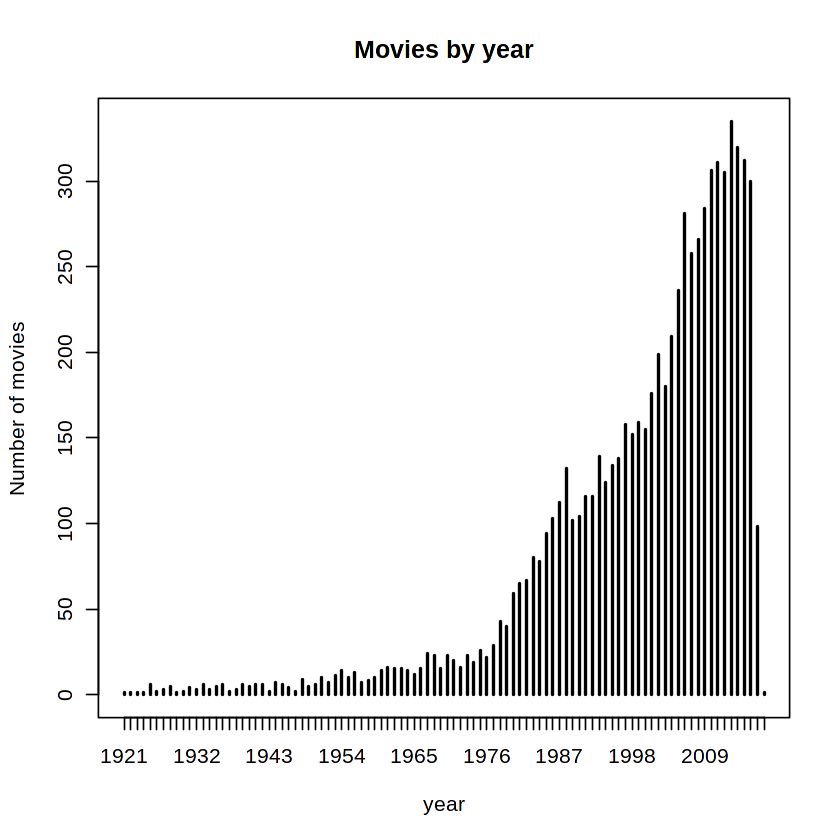

In [66]:
table(year(movies$release_date))
plot(table(year(movies$release_date)),ylab="Number of movies",xlab="year",main="Movies by year")


  1   2   3   4   5   6   7   8   9  10  11  12 
512 519 564 558 585 596 567 658 904 697 541 696 

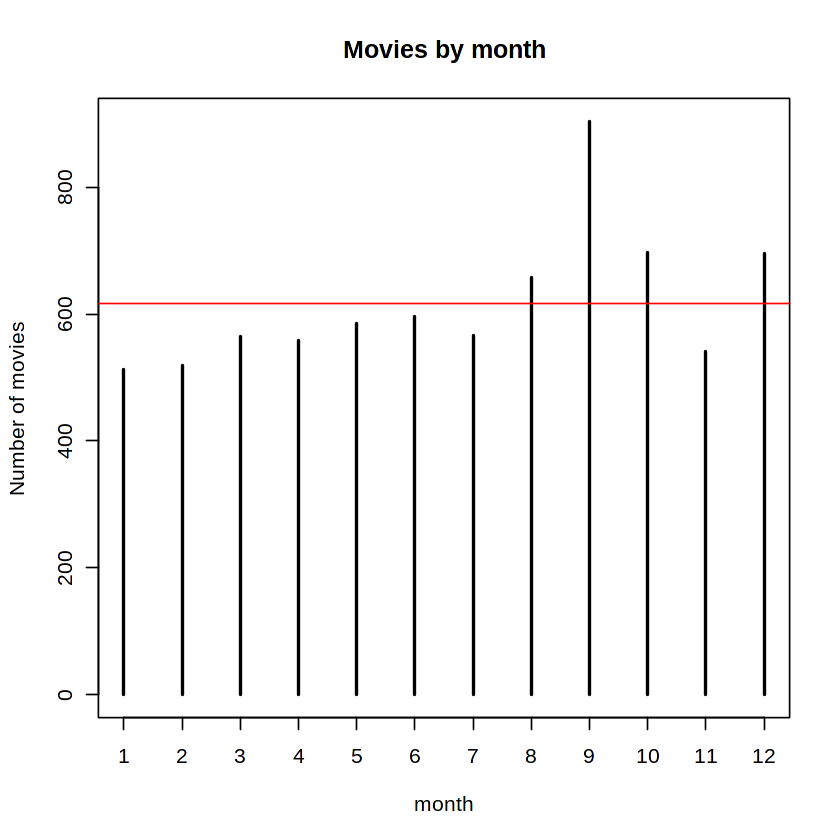

In [67]:
table(month(movies$release_date))
plot(table(month(movies$release_date)), ylab="Number of movies",xlab="month",main="Movies by month")
abline(h=mean(table(month(movies$release_date)),na.rm=T),col="red")


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
378 216 198 192 216 262 255 230 263 261 262 278 267 262 276 257 246 271 230 232 
 21  22  23  24  25  26  27  28  29  30  31 
260 262 220 231 292 209 195 197 170 193 116 

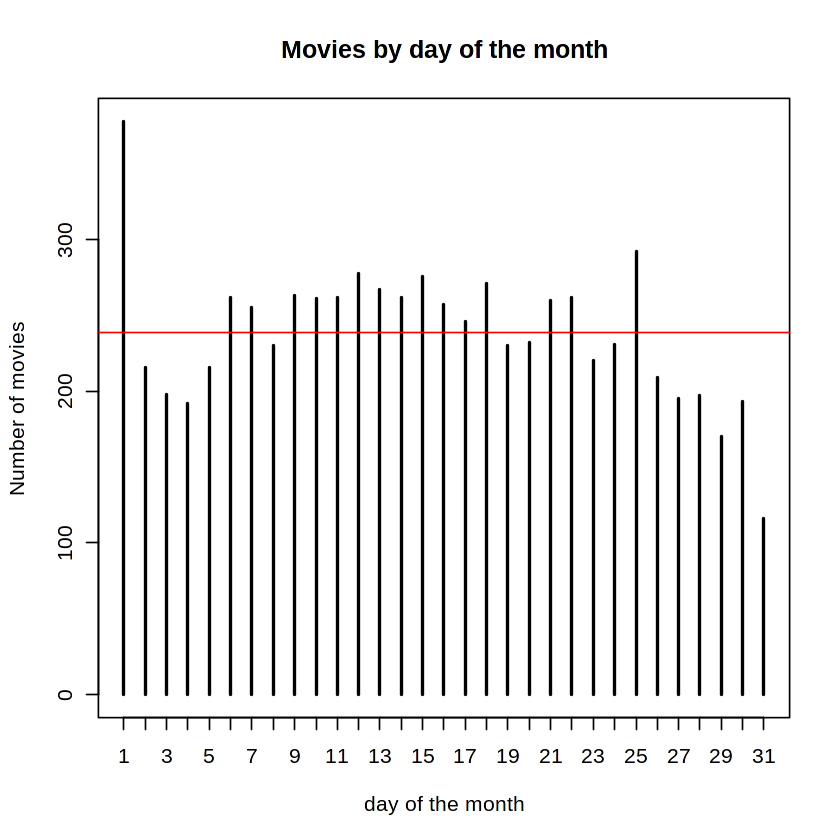

In [69]:
table(day(movies$release_date))
plot(table(day(movies$release_date)), ylab="Number of movies",xlab="day of the month",main="Movies by day of the month")
abline(h=mean(table(day(movies$release_date)),na.rm=T),col="red")

In [70]:
movie.time <- movies %>% 
    mutate(mv_year=year(release_date),mv_month=month(release_date)) %>%
    group_by(mv_year,mv_month) %>%
    summarise(n=n(),revenue_mean=mean(revenue,na.rm=T)) %>%
    select(mv_year,mv_month,n,revenue_mean) %>%
    filter(between(mv_year,1985,2016))

movie.time$revenue_mean <- ifelse(is.na(movie.time$revenue_mean),0,movie.time$revenue_mean)

movie.ts <- ts(movie.time$revenue_mean, start = c(1995, 1), end=c(2016,12), frequency = 12)

#ggplot() +
#    geom_line(aes(revenue_mean))


In [27]:
movie.ts

             Jan         Feb         Mar         Apr         May         Jun
1995         7.0  27233139.7  20325078.1    390659.0 102655170.8  43092109.2
1996         0.0  15377563.3  43077665.7   5239644.0 102281979.8  34245468.3
1997   3200000.0   9518342.0  47771934.3  46682407.3   4738953.0  89026106.7
1998   5943230.5  26998319.4  22785920.5  12120006.8 142984273.7 127698510.3
1999  12404204.0  31613133.7  15869676.6  35859929.3 237182311.0 134387126.2
2000  17030246.2  15090573.5   1305887.0  15774499.5  66171444.8 120099324.5
2001   6853159.3  47364374.5  65595485.0  14306523.8  34356941.4 207845078.5
2002  21621000.0         0.0 128423252.7  35869301.0  41940206.5 229025793.5
2003   5491903.0  83964186.0   9656090.8   9730836.7  46769121.3 203906638.4
2004   1653565.3  31836719.2  91361220.7  11733804.0   6918586.5 406287050.0
2005  22113553.8  46534021.0  74994077.7  68323846.3 129557236.3 130175169.6
2006  13939573.0  19079086.0  39839408.3  33107713.0  19632619.3 142150966.2

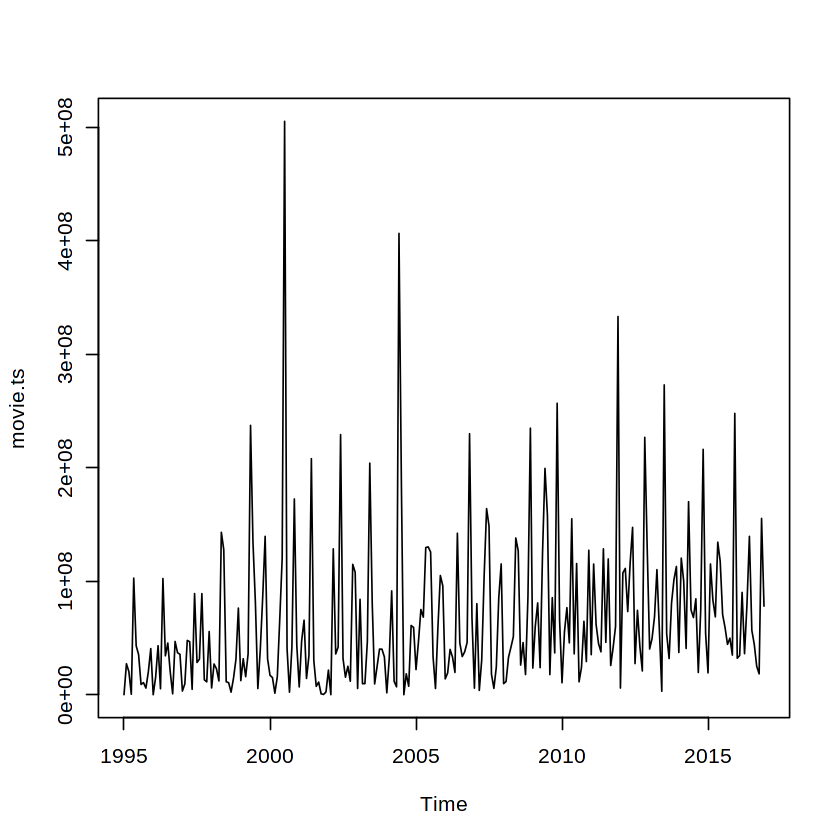

In [71]:
plot(movie.ts)

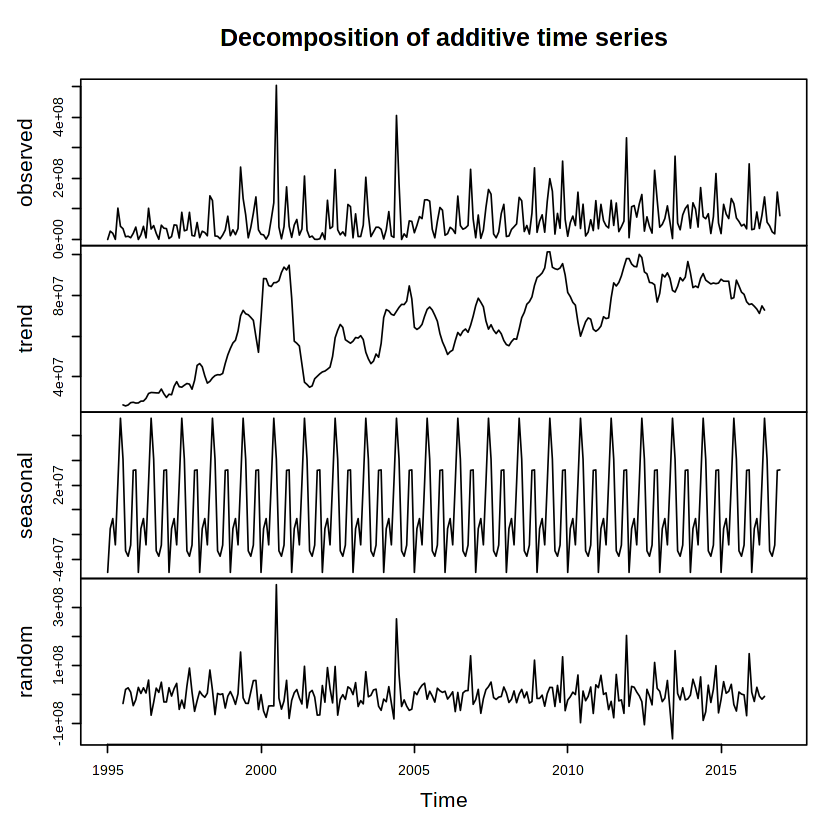

In [72]:
plot(decompose(movie.ts))

In [73]:
movie.dec <- decompose(movie.ts)


In [77]:
movie.dec$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
1996,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
1997,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
1998,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
1999,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
2000,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
2001,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
2002,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
2003,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910
2004,-50746591,-15309317,-7149862,-28405871,21757736,74205073,40981593,-33273015,-37667937,-28659422,31944703,32322910


In [79]:
montly_trend <- data.frame(month=c(1:12),season=movie.dec$seasonal[1:12])
montly_trend

month,season
<int>,<dbl>
1,-50746591
2,-15309317
3,-7149862
4,-28405871
5,21757736
6,74205073
7,40981593
8,-33273015
9,-37667937


In [80]:
movie.dec$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,NA,NA,NA,NA,NA,NA,26249607,25755625,26209667,27359732,27546224,27162064
1996,27218260,28097763,28141656,29440029,31854082,32349952,32274279,32163479,32114939,34037315,31699804,29918038
1997,31488809,31251310,35401870,37673219,35199332,34966973,35917849,36760482,36447731,33966547,38286669,45658240
1998,46562188,44989914,40511350,36954413,37831328,39510407,40638535,41100026,41004133,41705120,46619201,50822812
1999,53993241,56671252,58008876,62539480,70037739,72696654,71029314,70533626,69238361,67794644,59832298,52111520
2000,69190930,88337510,88257653,84876967,84420040,86295265,86374387,87295084,91318559,93936126,92549356,94879825
2001,78748511,57568832,56544623,55188525,46290767,37396055,36290245,34932056,35576364,39092637,40307055,41505555
2002,42459787,42867418,43783151,44827840,50066060,59231307,62951172,65777634,64327510,58289775,57401877,56556451
2003,57557868,59358622,59101931,60269790,58336021,52121032,48857136,46525227,47757630,51245467,49668485,56440564
2004,69171027,73074835,72413150,70783023,70287863,72237374,74171967,75636854,75567277,77243231,84711094,78316376


New possible variables: 
* month
* month_over_mean (0/1)
* day
* day_over_mean (0/1)
* montly_trend

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    94.0   104.0   107.7   118.0   338.0       6 


  0  11  25  26  38  40  42  44  46  53  57  59  60  62  63  64  65  66  67  68 
 21   1   1   1   1   3   1   1   1   1   1   1   1   1   2   1   3   4   1   2 
 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88 
  2   5   7  12   7  10  21  16  14  22  21  54  34  44  58  76  87  93 113 124 
 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 
136 229 148 155 193 170 211 202 207 195 171 234 160 176 151 164 200 165 154 163 
109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 
115 149 103 120 144  93 124 108 102 106  98 119  82  73  78  95  70  58  62  57 
129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 
 54  74  35  40  40  41  35  40  35  37  37  34  26  13  18  27  26  16  12   9 
149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 
 18  21  11  12  13  14  15   7  22   9   8   9  10  11   8   4   8   2   5   5 
169 170 171 172 174 175 176

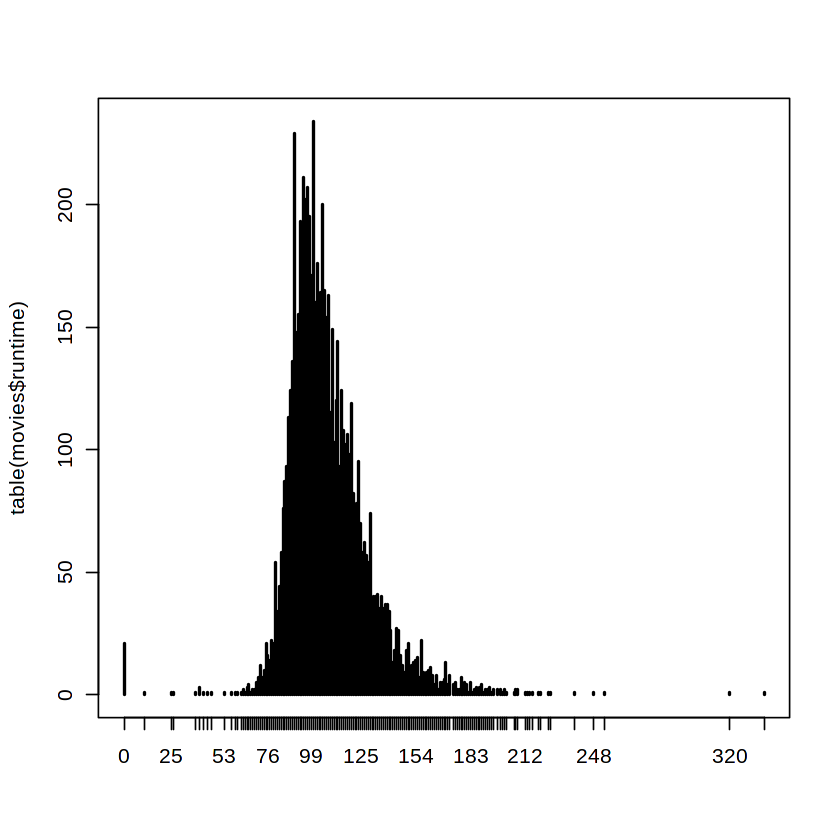

In [82]:
## runtime
summary(movies$runtime)
table(movies$runtime)
plot(table(movies$runtime))

In [99]:
## IQR = 94.0-118.0
movies$runtime_cat <- factor(ifelse(movies$runtime==0,NA,ifelse(movies$runtime<94,1,ifelse(movies$runtime>=118,3,2))),
                             levels=c(1,2,3),labels=c("Short","medium","large"))
summary(movies$runtime_cat)

Short medium  large   NA's 
  1709   3781   1881     27

In [84]:
### status
table(movies$status)


Post Production        Released         Rumored 
              5            7385               6 

NOTE: The status variable does not give useful information. Thus it must be removed

In [86]:
# tagline
length(unique(movies$tagline))
head(movies$tagline,10)

[1] 5925

[1] "The Laws of Space and Time are About to be Violated."        
 [2] "It can take a lifetime to find true love; she's got 30 days!"
 [3] "The road to greatness can take you to the edge."             
 [4] NA                                                            
 [5] NA                                                            
 [6] NA                                                            
 [7] "Fear The Demon That Doesn't Fear God"                        
 [8] "Different channels. Different truths."                       
 [9] "Set sail for Muppet mayhem!"                                 
[10] "Back together for the first time, again."

Too much information, must be analyzed using text mining techniques...

In [87]:
dbListTables(con)

[1] "actors_dim"       "collection_dim"   "countries_dim"    "crew_dim"        
 [5] "genres_dim"       "keywords_dim"     "movie_cast"       "movie_collection"
 [9] "movie_countries"  "movie_crew"       "movie_keywords"   "movie_languages" 
[13] "movie_overview"   "movie_produtors"  "movies"           "movies_genres"   
[17] "productors_dim"   "spoken_lang_dim"

# Actors

In [22]:
actors <- dbReadTable(con,"movie_cast")
head(actors)

cast_id,character,credit_id,id,movie_id,order
<int>,<chr>,<chr>,<int>,<int>,<int>
4,Lou,52fe4ee7c3a36847f82afae7,52997,1,0
5,Nick,52fe4ee7c3a36847f82afaeb,64342,1,1
6,Jacob,52fe4ee7c3a36847f82afaef,54729,1,2
7,Adam Jr.,52fe4ee7c3a36847f82afaf3,36801,1,3
8,Hot Tub Repairman,52fe4ee7c3a36847f82afaf7,54812,1,4
9,Jill,52fe4ee7c3a36847f82afafb,94098,1,5


In [100]:
actors_dim <- dbReadTable(con,"actors_dim")
head(actors_dim)

id,name,gender,profile_path
<int>,<chr>,<int>,<chr>
52997,Rob Corddry,2,/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg
64342,Craig Robinson,2,/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg
54729,Clark Duke,2,/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg
36801,Adam Scott,2,/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg
54812,Chevy Chase,2,/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg
94098,Gillian Jacobs,1,/rBnhe5vhNPnhRUdtYahBWx90fJM.jpg


In [101]:
summary(actors)

    cast_id         character          credit_id               id         
 Min.   :   0.00   Length:155034      Length:155034      Min.   :      1  
 1st Qu.:  11.00   Class :character   Class :character   1st Qu.:  17487  
 Median :  23.00   Mode  :character   Mode  :character   Median :  81681  
 Mean   :  46.49                                         Mean   : 470637  
 3rd Qu.:  44.00                                         3rd Qu.:1117296  
 Max.   :1119.00                                         Max.   :1908262  
    movie_id        order       
 Min.   :   1   Min.   :  0.00  
 1st Qu.:1893   1st Qu.:  5.00  
 Median :3734   Median : 11.00  
 Mean   :3718   Mean   : 17.45  
 3rd Qu.:5544   3rd Qu.: 22.00  
 Max.   :7398   Max.   :164.00  

In [102]:
table(actors$order)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
7069 7245 7237 7153 7051 6890 6721 6480 6252 5962 5647 5351 4998 4708 4417 3944 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
3563 3235 2987 2745 2509 2318 2148 1966 1833 1723 1630 1520 1435 1350 1279 1200 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
1128 1065 1010  959  915  867  821  784  743  711  677  654  618  591  564  533 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
 512  485  469  447  423  400  382  369  344  335  322  306  294  279  269  258 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
 250  240  226  214  204  199  193  180  173  166  154  149  140  133  129  127 
  80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
 119  116  108  105  101  101   97   92   92   87   85   85   82   81   78   75 
  96   97   98   99  100  1

In [103]:
famous <- actors %>% filter(order<5) %>% group_by(id) %>% tally() %>% arrange(desc(n)) %>% filter(n>=30)
head(famous)
nrow(famous)

id,n
<int>,<int>
380,67
2231,55
62,52
192,49
2963,49
16483,46


[1] 64

In [104]:
famous_sw <- famous
famous_sw$sw_famous <- 1
famous_sw$n <- NULL

In [105]:
famous <- left_join(famous, actors_dim[,1:3])
summary(famous)
head(famous,20)

Joining, by = "id"



       id                n          name               gender     
 Min.   :    3.0   Min.   :30   Length:64          Min.   :1.000  
 1st Qu.:  886.2   1st Qu.:31   Class :character   1st Qu.:2.000  
 Median : 2712.0   Median :34   Mode  :character   Median :2.000  
 Mean   : 5427.0   Mean   :36                      Mean   :1.875  
 3rd Qu.: 5121.0   3rd Qu.:38                      3rd Qu.:2.000  
 Max.   :72466.0   Max.   :67                      Max.   :2.000  

id,n,name,gender
<int>,<int>,<chr>,<int>
380,67,Robert De Niro,2
2231,55,Samuel L. Jackson,2
62,52,Bruce Willis,2
192,49,Morgan Freeman,2
2963,49,Nicolas Cage,2
16483,46,Sylvester Stallone,2
1231,44,Julianne Moore,1
31,41,Tom Hanks,2
3896,41,Liam Neeson,2


In [108]:
actors <- left_join(actors, actors_dim[,1:3])
head(actors)

Joining, by = c("id", "name", "gender")



cast_id,character,credit_id,id,movie_id,order,name,gender
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
4,Lou,52fe4ee7c3a36847f82afae7,52997,1,0,Rob Corddry,2
5,Nick,52fe4ee7c3a36847f82afaeb,64342,1,1,Craig Robinson,2
6,Jacob,52fe4ee7c3a36847f82afaef,54729,1,2,Clark Duke,2
7,Adam Jr.,52fe4ee7c3a36847f82afaf3,36801,1,3,Adam Scott,2
8,Hot Tub Repairman,52fe4ee7c3a36847f82afaf7,54812,1,4,Chevy Chase,2
9,Jill,52fe4ee7c3a36847f82afafb,94098,1,5,Gillian Jacobs,1


In [109]:
actors <- left_join(actors, famous_sw)
actors$sw_famous[which(is.na(actors$sw_famous)==TRUE)] <- 0
head(actors)

Joining, by = "id"



cast_id,character,credit_id,id,movie_id,order,name,gender,sw_famous
<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>
4,Lou,52fe4ee7c3a36847f82afae7,52997,1,0,Rob Corddry,2,0
5,Nick,52fe4ee7c3a36847f82afaeb,64342,1,1,Craig Robinson,2,0
6,Jacob,52fe4ee7c3a36847f82afaef,54729,1,2,Clark Duke,2,0
7,Adam Jr.,52fe4ee7c3a36847f82afaf3,36801,1,3,Adam Scott,2,0
8,Hot Tub Repairman,52fe4ee7c3a36847f82afaf7,54812,1,4,Chevy Chase,2,0
9,Jill,52fe4ee7c3a36847f82afafb,94098,1,5,Gillian Jacobs,1,0


In [110]:
### order by sex
actors %>% filter(order < 3) %>% group_by(order, gender) %>% tally()

order,gender,n
<int>,<int>,<int>
0,0,503
0,1,1643
0,2,4932
1,0,755
1,1,2730
1,2,3761
2,0,864
2,1,2455
2,2,3929


In [111]:
actor_gender <- actors %>% 
    group_by(movie_id) %>% 
    mutate(male=ifelse(gender==2,1,0),female=ifelse(gender==1,1,0),unk=ifelse(gender==0,1,0)) %>%
    summarize(male=sum(male,na.rm=T),female=sum(female,na.rm=T), unk=sum(unk,na.rm=T),n=n(),
              male_pct=sum(male,na.rm=T)/n(),female_pct=sum(female,na.rm=T)/n(), unk_pct=sum(unk,na.rm=T)/n(),
              sw_famous=max(sw_famous),famous_cnt=sum(sw_famous))

head(actor_gender)

movie_id,male,female,unk,n,male_pct,female_pct,unk_pct,sw_famous,famous_cnt
<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,8,6,24,0.4166667,0.3333333,0.2500000,1,1
2,10,10,0,20,0.5000000,0.5000000,0.0000000,0,0
3,13,7,31,51,0.2549020,0.1372549,0.6078431,0,0
4,2,1,4,7,0.2857143,0.1428571,0.5714286,0,0
5,4,0,0,4,1.0000000,0.0000000,0.0000000,0,0
6,2,0,2,4,0.5000000,0.0000000,0.5000000,0,0


In [114]:
summary(actor_gender)

    movie_id         male            female            unk         
 Min.   :   1   Min.   : 0.000   Min.   : 0.000   Min.   :  0.000  
 1st Qu.:1848   1st Qu.: 5.000   1st Qu.: 2.000   1st Qu.:  1.000  
 Median :3700   Median : 8.000   Median : 4.000   Median :  4.000  
 Mean   :3698   Mean   : 9.423   Mean   : 4.639   Mean   :  7.092  
 3rd Qu.:5546   3rd Qu.:12.000   3rd Qu.: 6.000   3rd Qu.:  8.000  
 Max.   :7398   Max.   :85.000   Max.   :87.000   Max.   :143.000  
       n             male_pct        female_pct        unk_pct      
 Min.   :  1.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 11.00   1st Qu.:0.3333   1st Qu.:0.1250   1st Qu.:0.1111  
 Median : 16.00   Median :0.4787   Median :0.2143   Median :0.2500  
 Mean   : 21.15   Mean   :0.4716   Mean   :0.2337   Mean   :0.2947  
 3rd Qu.: 24.00   3rd Qu.:0.6111   3rd Qu.:0.3333   3rd Qu.:0.4375  
 Max.   :165.00   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   sw_famous        famous_cnt    
 Min. 

# Productors

In [118]:
productors <- dbReadTable(con,"movie_produtors")
head(productors)

id,movie_id
<int>,<int>
4,1
60,1
8411,1
2,2
2266,3
3172,3


In [119]:
productor_cnt <- productors %>% group_by(id) %>% tally() %>% arrange(desc(n))
head(productor_cnt)

id,n
<int>,<int>
6194,491
33,463
4,393
306,341
5,236
8411,207


In [120]:
summary(productor_cnt)

       id              n          
 Min.   :    1   Min.   :  1.000  
 1st Qu.: 4770   1st Qu.:  1.000  
 Median :13191   Median :  1.000  
 Mean   :24656   Mean   :  2.844  
 3rd Qu.:37140   3rd Qu.:  2.000  
 Max.   :96043   Max.   :491.000  

In [121]:
productor_cnt$productor_cat <- factor(ifelse(productor_cnt$n>50,1,
                                      ifelse(productor_cnt$n>5,2,3)),
                                      levels=c(1,2,3),labels=c("Star","medium","low"))
summary(productor_cnt)
                                      

       id              n           productor_cat
 Min.   :    1   Min.   :  1.000   Star  :  30  
 1st Qu.: 4770   1st Qu.:  1.000   medium: 519  
 Median :13191   Median :  1.000   low   :6590  
 Mean   :24656   Mean   :  2.844                
 3rd Qu.:37140   3rd Qu.:  2.000                
 Max.   :96043   Max.   :491.000                

# Crew 

In [122]:
crew <- dbReadTable(con,"movie_crew")
head(crew)

credit_id,department,id,job,movie_id
<chr>,<chr>,<int>,<chr>,<int>
59ac067c92514107af02c8c8,Directing,1449071,First Assistant Director,1
52fe4ee7c3a36847f82afad7,Directing,3227,Director,1
5524ed25c3a3687ded000d88,Writing,347335,Writer,1
5524ed2d925141720c001128,Writing,347335,Characters,1
5524ed3d92514166c1004a5d,Production,57822,Producer,1
5524ed4bc3a3687df3000dd2,Production,1451395,Associate Producer,1


In [128]:
crew %>% group_by(job) %>% tally() %>% arrange(desc(n))

job,n
<chr>,<int>
Producer,14670
Executive Producer,8533
Director,8051
Screenplay,7381
Editor,7054
Casting,6055
Director of Photography,5611
Original Music Composer,4768
Art Direction,4637


In [129]:
crew_cnt <- crew %>% group_by(id) %>% tally() %>% arrange(desc(n))
head(crew_cnt)

id,n
<int>,<int>
2952,105
488,104
2294,100
5914,99
3965,88
1307,87


In [130]:
crew_cnt$crew_cat <- factor(ifelse(crew_cnt$n>50,1,
                            ifelse(crew_cnt$n>5,2,3)),
                            levels=c(1,2,3),labels=c("Star","medium","low"))
summary(crew_cnt)

       id                n             crew_cat    
 Min.   :      1   Min.   :  1.000   Star  :   49  
 1st Qu.:  75445   1st Qu.:  1.000   medium: 6773  
 Median :1365540   Median :  1.000   low   :62911  
 Mean   : 992702   Mean   :  2.575                 
 3rd Qu.:1554593   3rd Qu.:  3.000                 
 Max.   :1907371   Max.   :105.000                 

In [131]:
crew_jobs <- crew %>% group_by(movie_id,job) %>% tally() %>%
    group_by(movie_id) %>% summarise(crew_count=n())
head(crew_jobs)

movie_id,crew_count
<int>,<int>
1,59
2,7
3,46
4,3
5,2
6,7


# Languages

In [132]:
lang <- dbReadTable(con,"movie_languages")
head(lang)

iso_639_1,movie_id,sw_original_lang
<chr>,<int>,<int>
en,1,1
en,2,1
en,3,1
en,4,0
hi,4,1
ko,5,1


In [133]:
lang_cnt <- lang %>% group_by(movie_id) %>% summarise(lang_n=n())
head(lang_cnt)
summary(lang_cnt)

movie_id,lang_n
<int>,<int>
1,1
2,1
3,1
4,2
5,1
6,1


    movie_id        lang_n     
 Min.   :   1   Min.   :1.000  
 1st Qu.:1849   1st Qu.:1.000  
 Median :3690   Median :1.000  
 Mean   :3695   Mean   :1.458  
 3rd Qu.:5544   3rd Qu.:2.000  
 Max.   :7398   Max.   :9.000  


   1    2    3    4    5    6    7    8    9 
5226 1319  502  178   73   25    6    4    3 

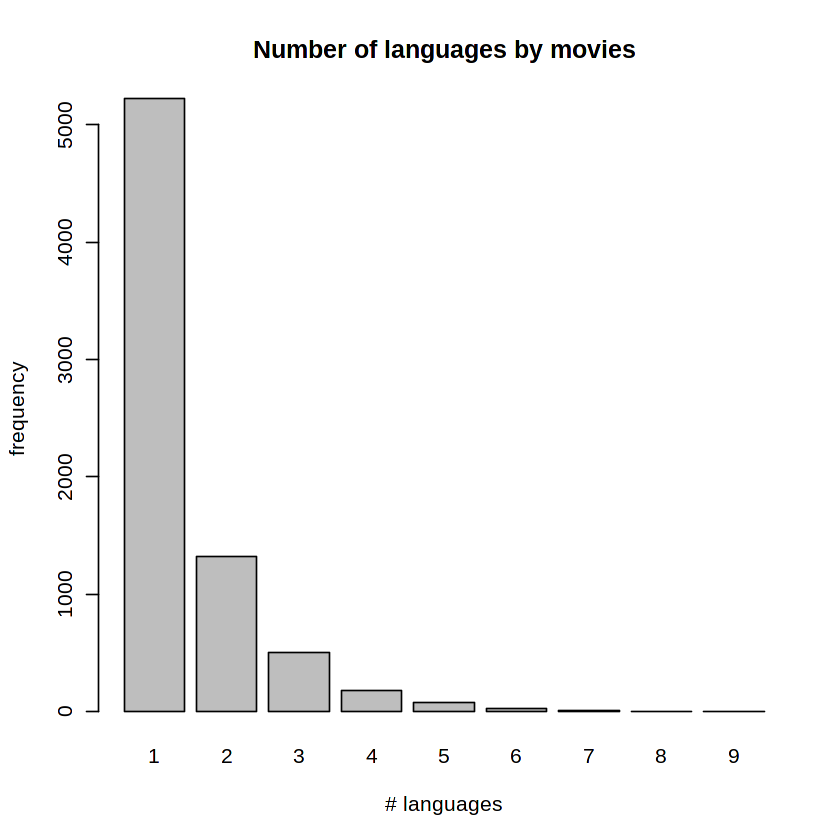

In [134]:
table(lang_cnt$lang_n)
barplot(table(lang_cnt$lang_n),main="Number of languages by movies",xlab="# languages",ylab="frequency")

# Countries

In [135]:
countries <- dbReadTable(con,"movie_countries")
head(countries)

iso_3166_1,movie_id
<chr>,<int>
US,1
US,2
US,3
IN,4
KR,5
US,7


In [136]:
country_cnt <- countries %>% group_by(movie_id) %>% tally()
head(country_cnt)

movie_id,n
<int>,<int>
1,1
2,1
3,1
4,1
5,1
7,2


In [137]:
table(country_cnt$n)


   1    2    3    4    5    6    7    8    9   10   12 
5464 1227  361  128   42   11    1    3    2    1    1 

In [66]:
country_cnt$country_num <- factor(ifelse(country_cnt$n > 4,5,country_cnt$n), 
                                  levels=c(1,2,3,4,5),
                                  labels=c("1","2","3","4","5+"))
summary(country_cnt)

    movie_id          n          country_num
 Min.   :   1   Min.   : 1.000   1 :5464    
 1st Qu.:1844   1st Qu.: 1.000   2 :1227    
 Median :3689   Median : 1.000   3 : 361    
 Mean   :3694   Mean   : 1.362   4 : 128    
 3rd Qu.:5548   3rd Qu.: 1.000   5+:  61    
 Max.   :7398   Max.   :12.000              

# Genre

In [138]:
genre <- dbReadTable(con,"movies_genres")
genre2 <- dbReadTable(con,"genres_dim")
genre <- left_join(genre,genre2)
gncat <- genre2$name
rm(genre2)
head(genre)

Joining, by = "id"



id,movie_id,name
<int>,<int>,<chr>
35,1,Comedy
35,2,Comedy
18,2,Drama
10751,2,Family
10749,2,Romance
18,3,Drama


In [139]:
gncat

[1] "Comedy"          "Drama"           "Family"          "Romance"        
 [5] "Thriller"        "Action"          "Animation"       "Adventure"      
 [9] "Horror"          "Documentary"     "Music"           "Crime"          
[13] "Science Fiction" "Mystery"         "Foreign"         "Fantasy"        
[17] "War"             "Western"         "History"         "TV Movie"

In [69]:
#gncat <- paste("genre",gsub(" ", "_", gncat),sep="_")
#gncat

In [70]:
genre %>% group_by(name) %>% tally()

name,n
Action,1735
Adventure,1116
Animation,382
Comedy,2605
Crime,1084
Documentary,221
Drama,3676
Family,675
Fantasy,628
Foreign,84


In [140]:
genre %>% filter(name=="TV Movie")

id,movie_id,name
<int>,<int>,<chr>
10770,1694,TV Movie


In [141]:
movies %>% filter(id==1694)

id,budget,homepage,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,tagline,revenue,runtime_cat
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<date>,<dbl>,<chr>,<chr>,<int>,<fct>
1694,5000000,http://www.bbc.co.uk/programmes/p00t8qnw,tt0116118,en,Doctor Who,5.147819,/sPdmcY6OSGOFDagLbJCqyzYYlt9.jpg,1996-03-31,89,Released,He's Back...and It's About Time!,42000000,Short


The unique TV show is categorized also as "Science Fiction". Thus we need to recode it to this last genre category.

In [144]:
genre$name[which(genre$name=="TV Movie")] <- "Science Fiction"
gncat <- gncat[1:length(gncat)-1]

In [146]:
genre %>% group_by(name) %>% tally()

name,n
<chr>,<int>
Action,1735
Adventure,1116
Animation,382
Comedy,2605
Crime,1084
Documentary,221
Drama,3676
Family,675
Fantasy,628


We can apply one-hot-encoding to the data...

In [147]:
genre2 <- genre
for(x in gncat) {
    categ <- paste("genre",gsub(" ", "_", x),sep="_")
    genre2[categ] <- ifelse(genre2$name==x,1,0)
}
head(genre2)

id,movie_id,name,genre_Comedy,genre_Drama,genre_Family,genre_Romance,genre_Thriller,genre_Action,genre_Animation,⋯,genre_Horror,genre_Documentary,genre_Music,genre_Crime,genre_Science_Fiction,genre_Mystery,genre_Foreign,genre_Fantasy,genre_War,genre_Western
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,1,Comedy,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
35,2,Comedy,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
18,2,Drama,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10751,2,Family,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10749,2,Romance,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
18,3,Drama,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Collections

In [148]:
collect <- dbReadTable(con,"movie_collection")
collect2 <- dbReadTable(con,"collection_dim")
collect <- left_join(collect,collect2)
head(collect)

Joining, by = "id"



id,movie_id,name,poster_path,backdrop_path
<int>,<int>,<chr>,<chr>,<chr>
4,1,NA,NA,NA
60,1,NA,NA,NA
8411,1,NA,NA,NA
2,2,NA,NA,NA
2266,3,NA,NA,NA
3172,3,NA,NA,NA


In [149]:
dim(collect2)
head(collect2)

[1] 750   4

id,name,poster_path,backdrop_path
<int>,<chr>,<chr>,<chr>
313576,Hot Tub Time Machine Collection,/iEhb00TGPucF0b4joM1ieyY026U.jpg,/noeTVcgpBiD48fDjFVic1Vz7ope.jpg
107674,The Princess Diaries Collection,/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg,/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg
256377,The Muppet Collection,/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg,/1AWd3MM90G47mxtD112gRDxSXY9.jpg
1575,Rocky Collection,/mCY5dMkSSFQufGCViI6jNUU6pXq.jpg,/w4h6gjdWPvmu5R9H6zeGDPo1ZuV.jpg
48190,Revenge of the Nerds Collection,/qOnoXEdrSnBuS3FMAFRIgyJSM2r.jpg,NA
91698,Chili Palmer Collection,/ae3smJDdWrMJ77tDpYOrpo4frKq.jpg,/uWaANGQeoSs5vSP1CWtlkDrkqei.jpg


In [150]:
collect %>% filter(is.na(name)==FALSE) %>% tally()

n
<int>
217


Something is wrong with the collection! there are 750 collections, but only 217 movies are related to those collections !!! 

We can't use the collection data!

# Keywords

In [151]:
keywd <- dbReadTable(con,"movie_keywords")
keywd2 <- dbReadTable(con,"keywords_dim")
keywd <- left_join(keywd,keywd2)
head(keywd)

Joining, by = "id"



id,movie_id,name
<int>,<int>,<chr>
4379,1,time travel
9663,1,sequel
11830,1,hot tub
179431,1,duringcreditsstinger
2505,2,coronation
4263,2,duty


In [152]:
## number of movies by keyword
keywd %>% group_by(name) %>% tally() %>% arrange(desc(n)) %>% head(30)

name,n
<chr>,<int>
woman director,457
independent film,384
duringcreditsstinger,350
based on novel,312
murder,305
violence,245
love,190
revenge,188
sex,186


Warning message in wordcloud(words = kw$name, freq = kw$n, min.freq = 1, max.words = 200, :
“sister sister relationship could not be fit on page. It will not be plotted.”


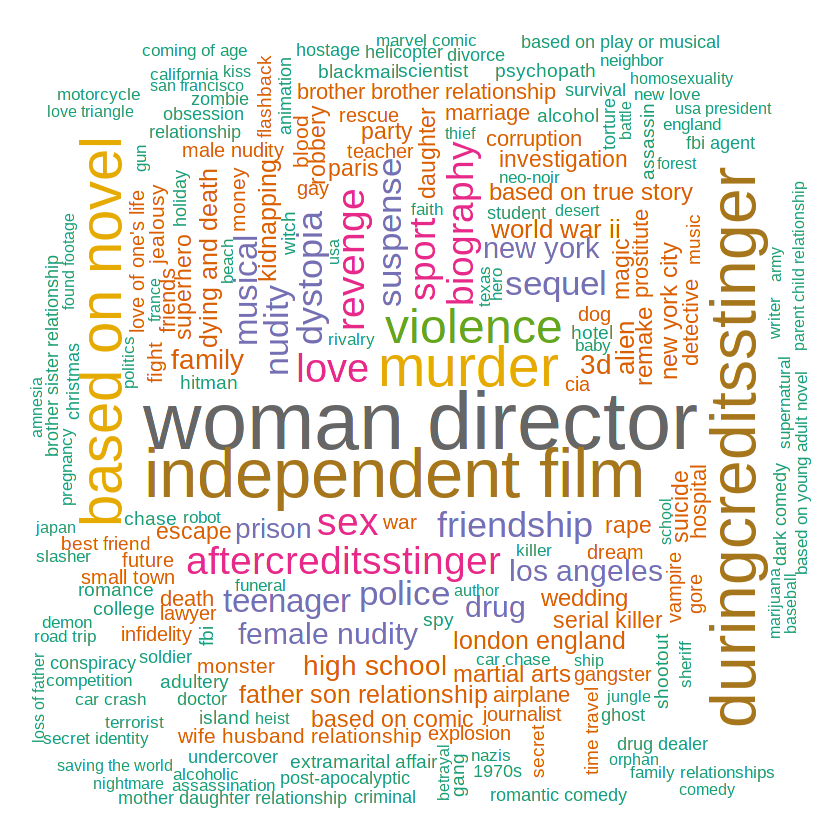

In [158]:
library(wordcloud)
kw <- keywd %>% group_by(name) %>% tally() %>% arrange(desc(n))
wordcloud(words = kw$name, freq = kw$n, min.freq = 1,           
             max.words=200, random.order=FALSE, rot.per=0.35,            
             colors=brewer.pal(8, "Dark2"))


In [156]:
## number of keywords by movie
keywd %>% group_by(movie_id) %>% tally() %>% arrange(desc(n)) %>% head(20)

movie_id,n
<int>,<int>
1794,149
2956,97
6805,60
5140,44
2449,43
3833,41
1464,40
5345,40
1419,39


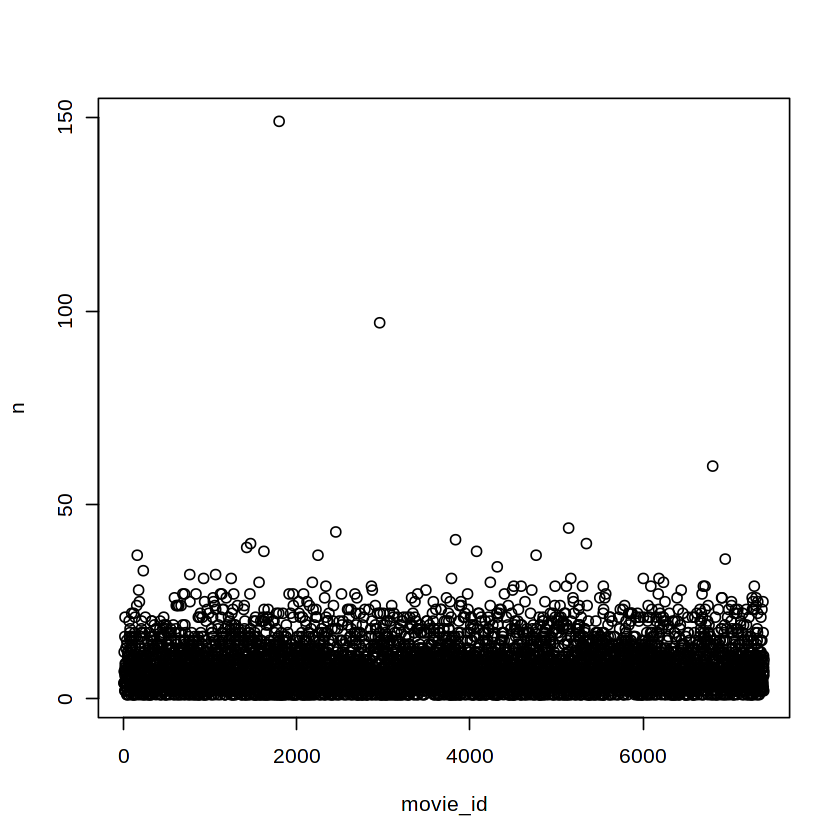

In [159]:
scatter.smooth(keywd %>% group_by(movie_id) %>% tally() %>% arrange(desc(n)))

In [160]:
keywd %>% filter(movie_id==1794) %>% select(name)

name
<chr>
dancing
male nudity
circus
moon
bathroom
philosophy
hotel
fire
helicopter


In [162]:
movies %>% filter(id == 1794)

id,budget,homepage,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,tagline,revenue,runtime_cat
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<date>,<dbl>,<chr>,<chr>,<int>,<fct>
1794,0,NA,tt0249241,hu,Werckmeister harmóniák,7.970312,/7Hqy3GDNl5irPiDlBEKrJD02Qkb.jpg,2000-07-12,145,Released,NA,25461,large


# Revenue

In [2]:
summary(movies$revenue)
hist(movies$revenue)

ERROR: Error in summary(movies$revenue): object 'movies' not found


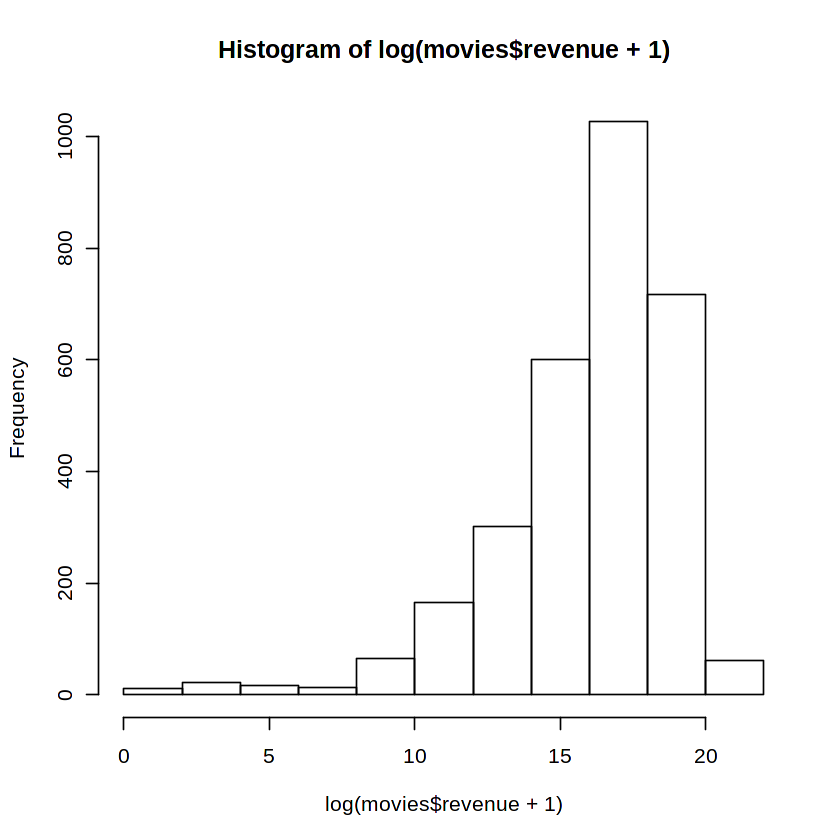

In [164]:
hist(log(movies$revenue+1))

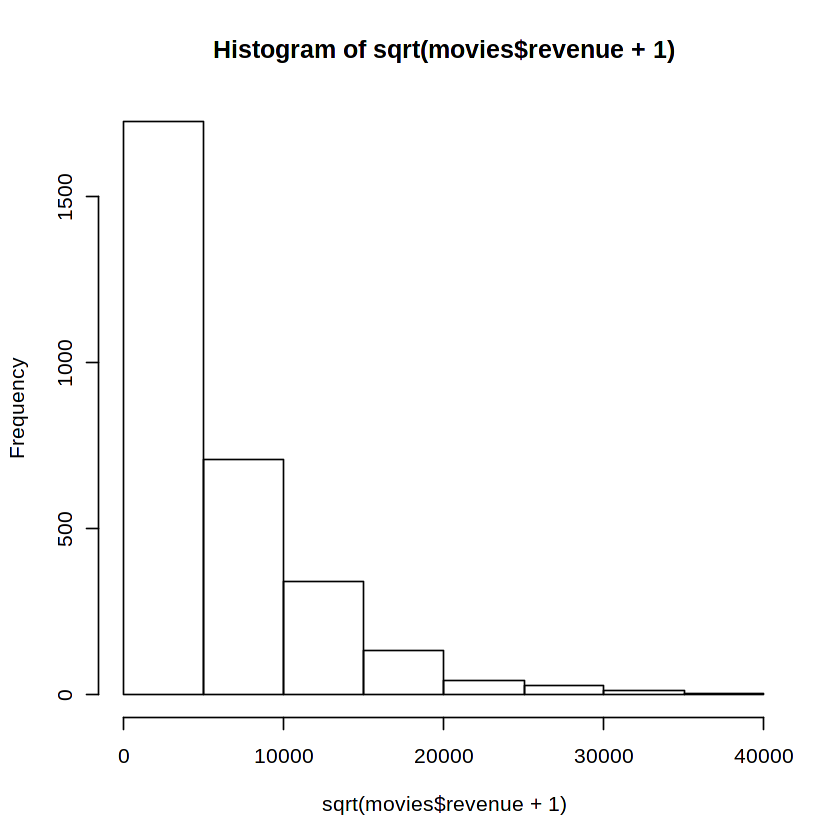

In [170]:
hist(sqrt(movies$revenue+1))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.00e+00 0.00e+00 7.50e+06 2.26e+07 2.80e+07 3.80e+08 

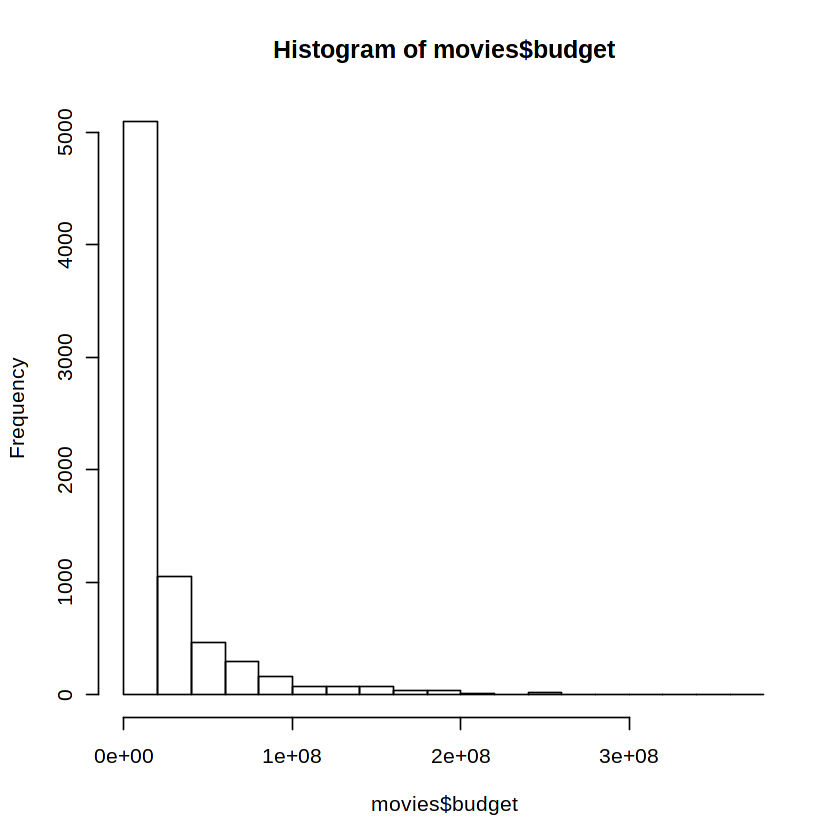

In [171]:
summary(movies$budget)
hist(movies$budget)

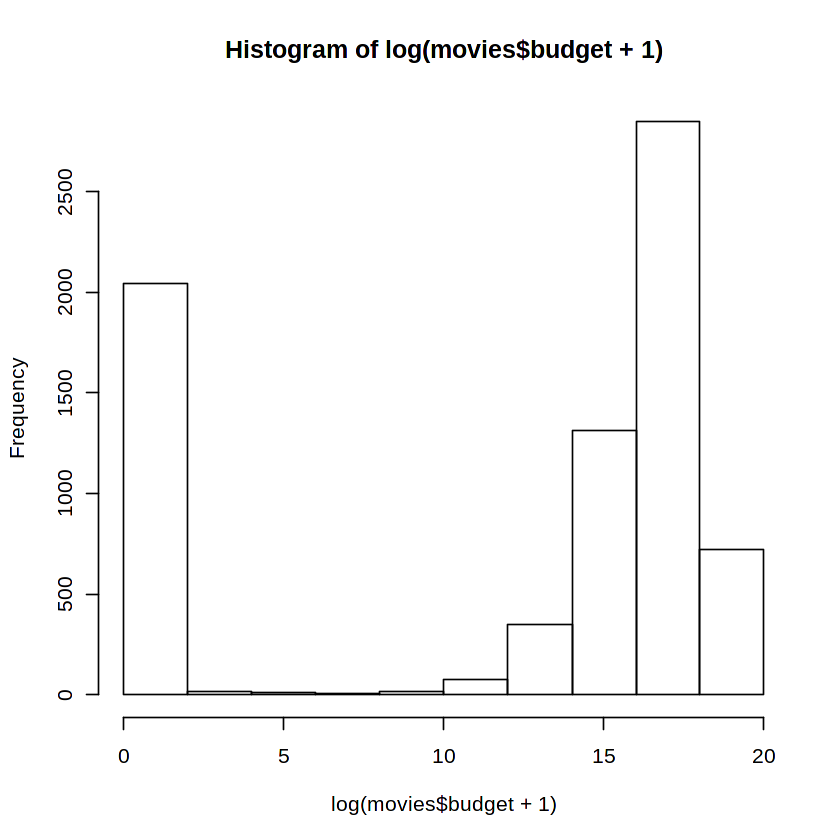

In [172]:
hist(log(movies$budget+1))

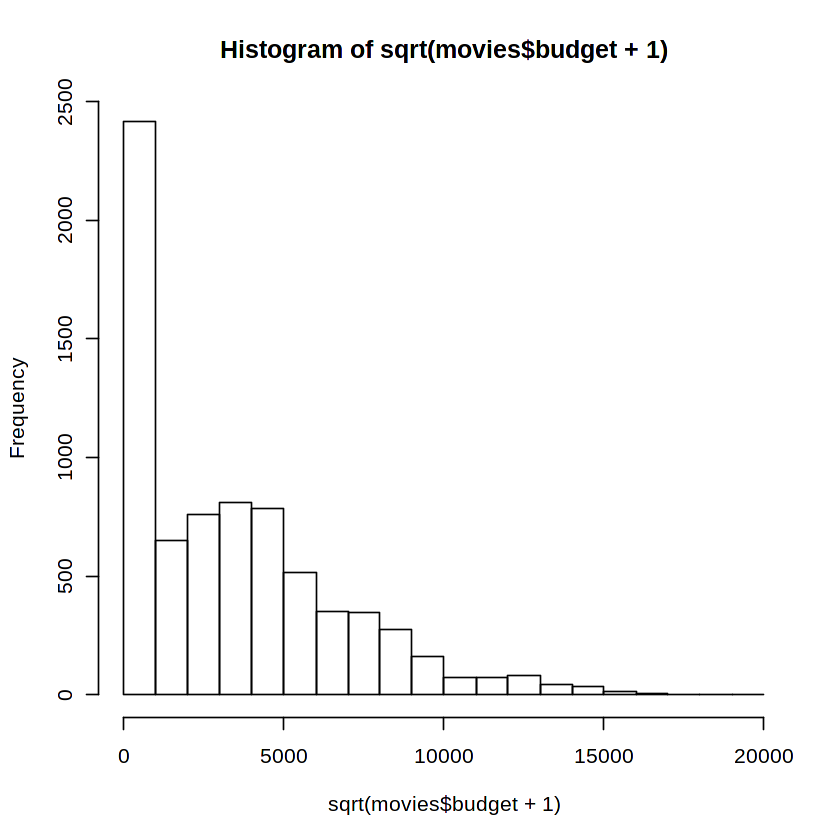

In [175]:
hist(sqrt(movies$budget+1))

In [176]:
### Top ten by year...
top10 <- movies %>% mutate(yr=year(release_date)) %>% select(id,yr, revenue) %>% group_by(yr) %>% 
    arrange(yr,desc(revenue)) %>%top_n(10,revenue)
tail(top10,11)

id,yr,revenue
<int>,<dbl>,<int>
287,2016,276921998
685,2017,1262886337
2127,2017,863416141
519,2017,820580447
1784,2017,616801808
1631,2017,604942143
2730,2017,498814908
1867,2017,407778013
1716,2017,369907963


In [177]:
top10$top10 <- 1
movies <- left_join(movies, top10[,c(1,4)])

Joining, by = "id"



In [178]:
movies$top10[which(is.na(movies$top10)==TRUE)] <- 0

In [179]:
table(movies$top10)


   0    1 
6783  615 

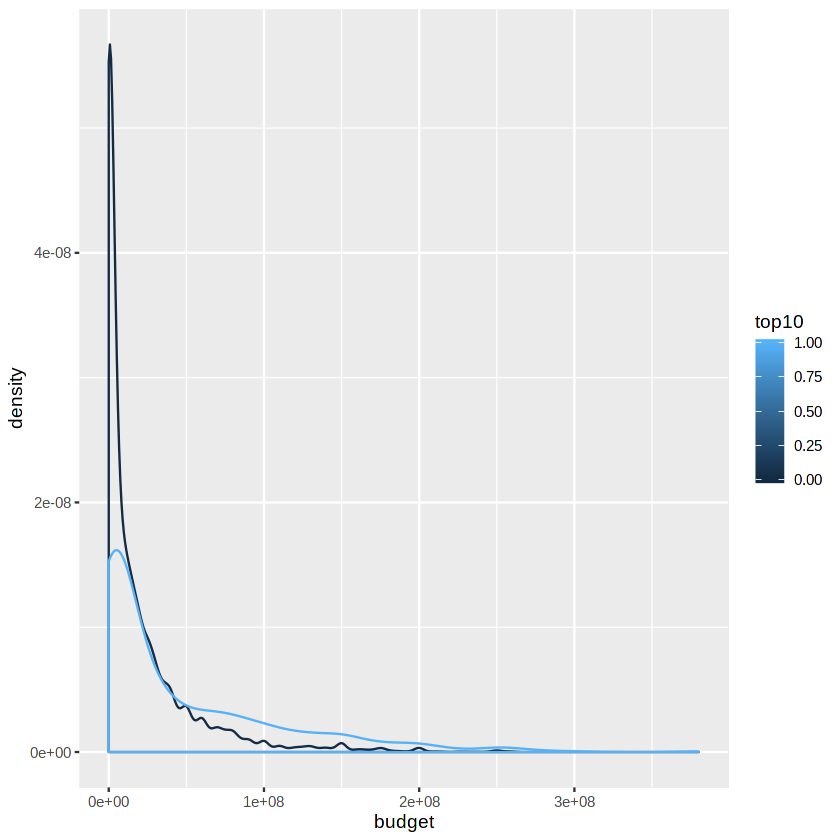

In [180]:
## top10 vs other vars
ggplot(data=movies) +
    geom_density(aes(x=budget, group=top10, color=top10))

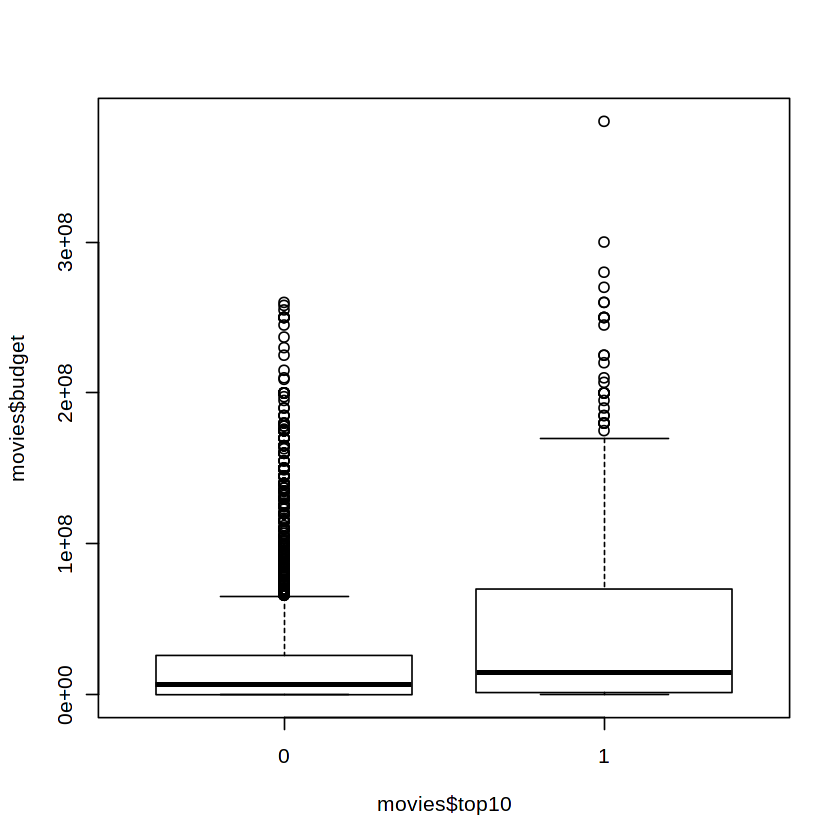

In [181]:
boxplot(movies$budget ~ movies$top10)

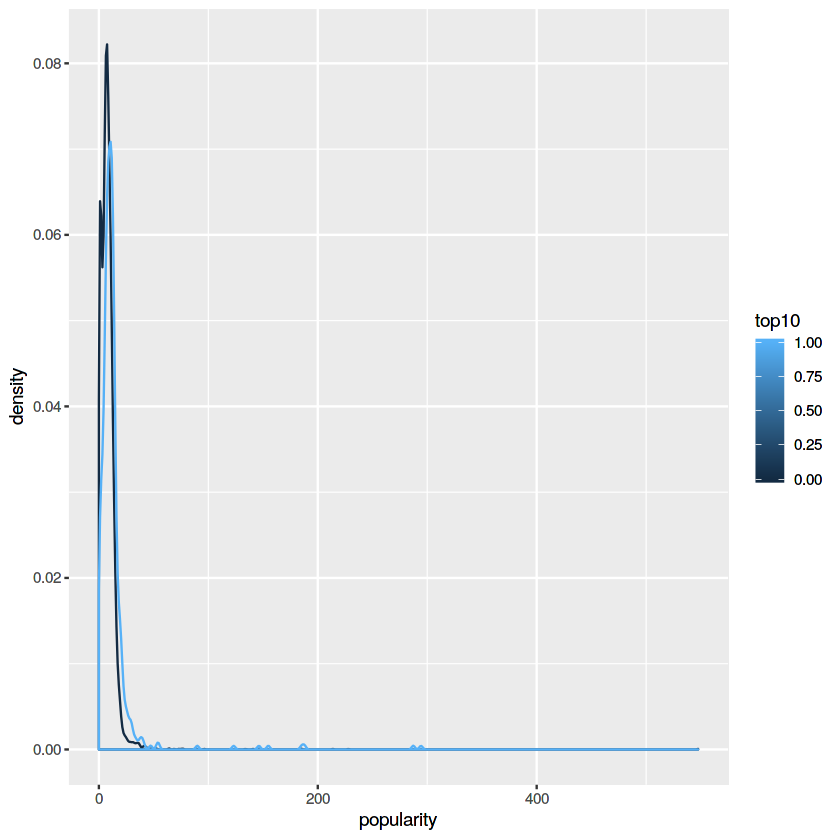

In [119]:
ggplot(data=movies) +
    geom_density(aes(x=popularity, group=top10, color=top10))

Warning message:
“Removed 6 rows containing non-finite values (stat_density).”

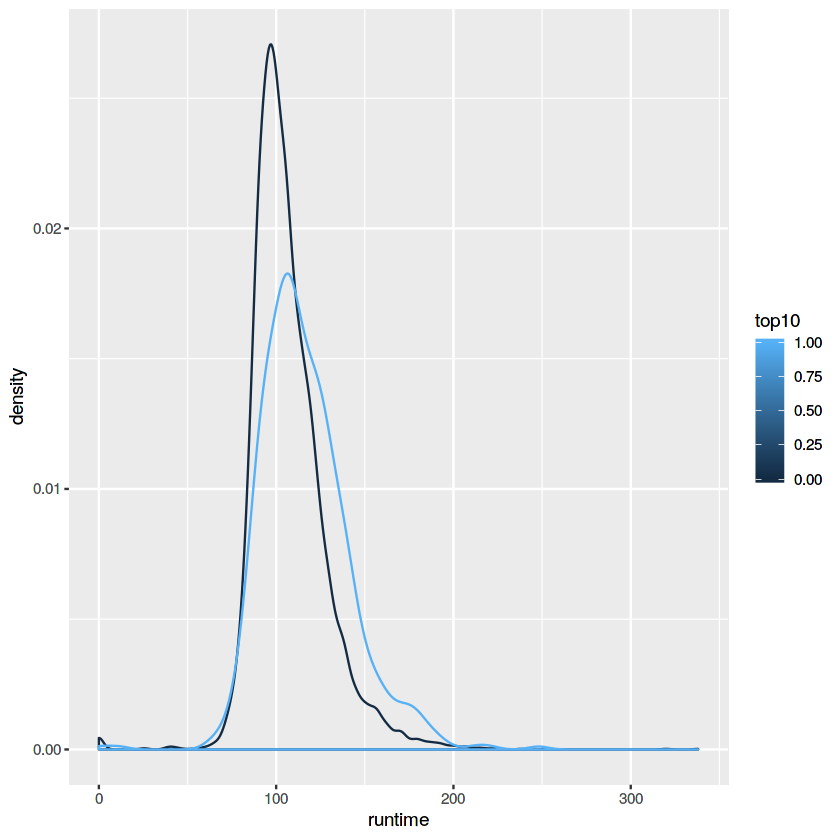

In [120]:
ggplot(data=movies) +
    geom_density(aes(x=runtime, group=top10, color=top10))

# Discussion

 
1. Based on the analysis in this notebook, did you changed your mind about the variables you selected in the last class?

2. Which variables may change over the years? 

3. Did you think that things like actors popularity changes over time? If yes, How do you make this to be reflected on the data? 

